In [1]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import statsmodels.api as sm

Wczytaj dane opisujące ilość plam słonecznych w okresie od 1700 do 2008 r.

In [3]:
series = Series.from_csv('./sunspots.csv', header=0)
series.head()

C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:3724: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


YEAR
1700-01-01     5.0
1701-01-01    11.0
1702-01-01    16.0
1703-01-01    23.0
1704-01-01    36.0
Name: SUNACTIVITY, dtype: float64

In [4]:
series.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
series.index

DatetimeIndex(['1700-12-31', '1701-12-31', '1702-12-31', '1703-12-31',
               '1704-12-31', '1705-12-31', '1706-12-31', '1707-12-31',
               '1708-12-31', '1709-12-31',
               ...
               '1999-12-31', '2000-12-31', '2001-12-31', '2002-12-31',
               '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31'],
              dtype='datetime64[ns]', length=309, freq=None)

# Narysujmy szereg czasowy

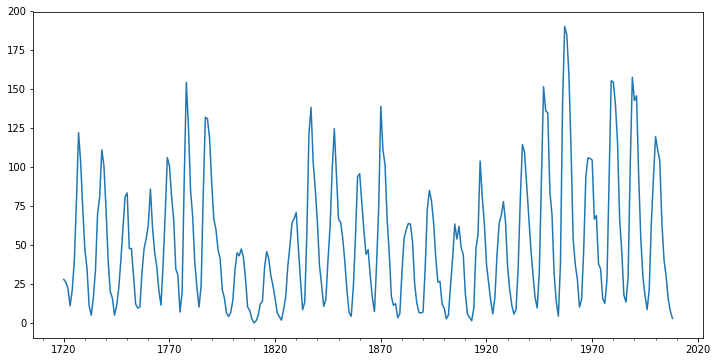

In [5]:
plt.figure(figsize=(12,6));
series.loc['1720':].plot()
plt.show()

# Dzielę próbkę na train test

In [8]:
series1=series.loc['1720':'1950']
series2=series.loc['1951':'2008']

# Zadanie
Wykonaj predykcję za pomocą modelu AR:
- za pomocą prostej predykcji 
- przeuczając model za każdym razem gdy pojawia się nowy punkt
- nie przeuczając modelu ale używając nowo pojawiających się punktów

In [39]:
model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
#print('Test MSE: %.3f' % error)
# plot


C:\Users\przem\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  % freq, ValueWarning)


In [40]:
pre3=pd.Series(predictions, index=series2.index)

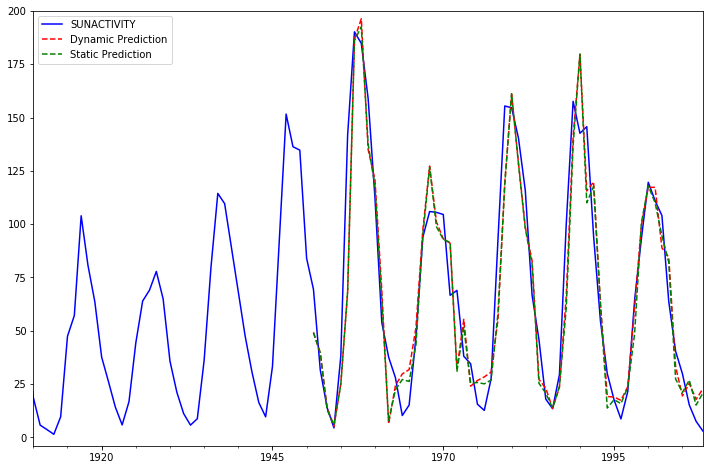

In [44]:
ax = series.loc['1720':].plot(style='b', figsize=(12,8))
pre.plot(ax=ax, style='r--', label='Dynamic Prediction');
#pre1.plot(ax=ax, style='y--', label='Simple Prediction');
pre3.plot(ax=ax, style='g--', label='Static Prediction');
ax.legend();
ax.axis((-60.0, 38.0, -4.0, 200.0));
plt.show()
